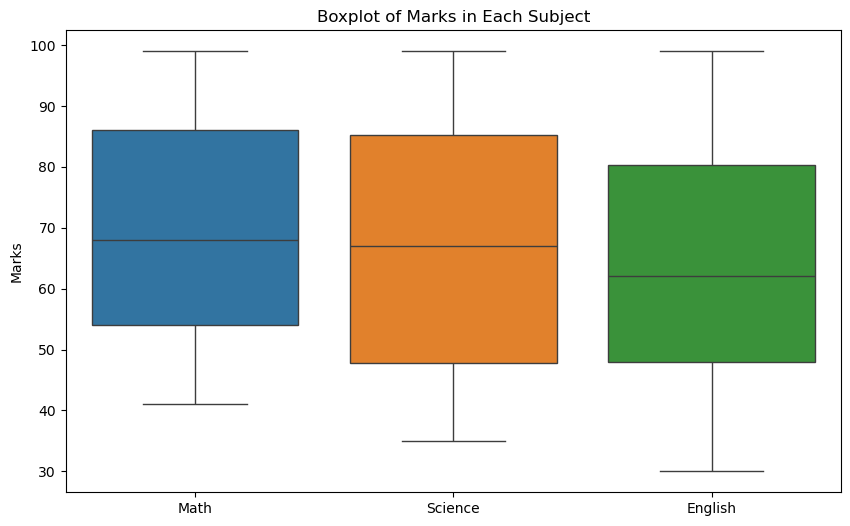

Top 5 Students:
        Student    Average
14  Student_15  92.333333
0    Student_1  90.333333
33  Student_34  90.333333
27  Student_28  86.666667
59  Student_60  84.000000 

Subject-wise Stats:
           mean        std
Math     69.58  18.031499
Science  66.88  20.386805
English  63.96  20.011068 

Subject with highest variation: Science


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate sample data
np.random.seed(42)
df = pd.DataFrame({
    'Student': [f'Student_{i+1}' for i in range(100)],
    'Math': np.random.randint(40, 100, 100),
    'Science': np.random.randint(35, 100, 100),
    'English': np.random.randint(30, 100, 100)
})

# (a) Average marks per student and top 5 performers
df['Average'] = df[['Math','Science','English']].mean(axis=1)
top5 = df.nlargest(5, 'Average')  # Top 5 students

# (b) Subject-wise mean and std, highest variation subject
subject_stats = df[['Math','Science','English']].agg(['mean','std']).T
highest_variation_subject = subject_stats['std'].idxmax()

# (c) Boxplot for each subject
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['Math','Science','English']])
plt.title("Boxplot of Marks in Each Subject")
plt.ylabel("Marks")
plt.show()

# Display results
print("Top 5 Students:\n", top5[['Student','Average']], "\n")
print("Subject-wise Stats:\n", subject_stats, "\n")
print("Subject with highest variation:", highest_variation_subject)


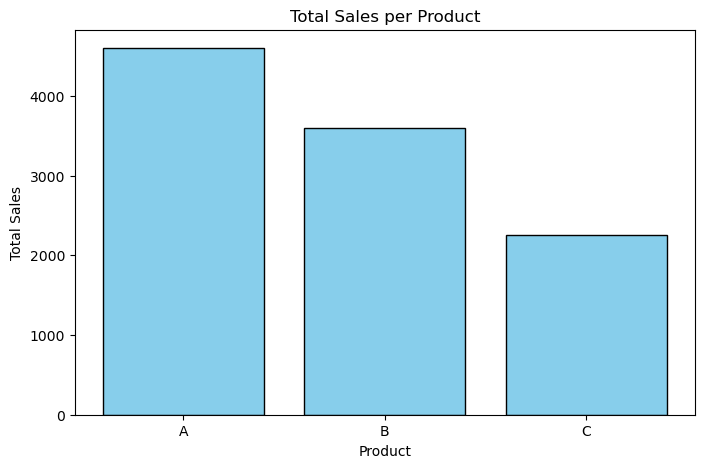

Overall Revenue: 10450

Sales by Region:
 Region
East     2700
North    2650
South    2500
West     2600
Name: Total, dtype: int64

Top Region: East

Sales by Product:
 Product
A    4600
B    3600
C    2250
Name: Total, dtype: int64

Underperforming Products: ['C']


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Create sales dataset
df = pd.DataFrame({
    'Product': ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C', 'A'],
    'Quantity': [10, 5, 8, 12, 6, 4, 15, 7, 3, 9],
    'Price': [100, 200, 150, 100, 200, 150, 100, 200, 150, 100],
    'Region': ['North', 'South', 'East', 'West', 'North', 'South', 'East', 'West', 'North', 'South']
})

# (a) Add Total column and compute overall revenue
df['Total'] = df['Quantity'] * df['Price']
overall_revenue = df['Total'].sum()

# (b) Group by Region and find which region has highest sales
region_sales = df.groupby('Region')['Total'].sum()
top_region = region_sales.idxmax()  # Region with maximum total sales

# (c) Plot total sales per product to see underperforming products
product_sales = df.groupby('Product')['Total'].sum()
plt.figure(figsize=(8,5))
plt.bar(product_sales.index, product_sales.values, color='skyblue', edgecolor='black')
plt.xlabel("Product")
plt.ylabel("Total Sales")
plt.title("Total Sales per Product")
plt.show()

# Display results
print("Overall Revenue:", overall_revenue)
print("\nSales by Region:\n", region_sales)
print("\nTop Region:", top_region)
print("\nSales by Product:\n", product_sales)

# Optional comment on underperforming products
underperforming = product_sales[product_sales < product_sales.mean()].index.tolist()
print("\nUnderperforming Products:", underperforming)


Correlation of mpg with other features:
 mpg             1.000000
model year      0.580541
origin          0.565209
acceleration    0.423329
cylinders      -0.777618
horsepower     -0.778427
displacement   -0.805127
weight         -0.832244
Name: mpg, dtype: float64


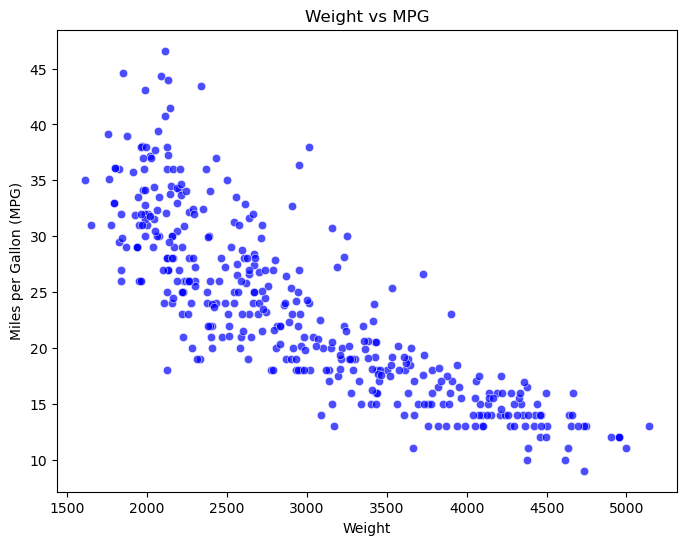

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("auto-mpg.csv")

# Keep only numeric columns for analysis
numeric_cols = ['mpg', 'cylinders', 'displacement', 'horsepower', 
                'weight', 'acceleration', 'model year', 'origin']

# Convert horsepower to numeric and drop rows with missing values
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df = df[numeric_cols].dropna()

# (a) Correlation of mpg with numeric features
correlation = df.corr()['mpg'].sort_values(ascending=False)
print("Correlation of mpg with other features:\n", correlation)

# (b) Scatter plot of weight vs mpg
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='weight', y='mpg', color='blue', alpha=0.7)
plt.title("Weight vs MPG")
plt.xlabel("Weight")
plt.ylabel("Miles per Gallon (MPG)")
plt.show()
